In [1]:
import pandas as pd

In [2]:
# Import CSV_file form Github 
df = pd.read_csv(r"https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# checking if there is any null values:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
# check if there are any Duplicates value:
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


### 1.	Descriptive Statistics:

- descriptive statistics for each of the score columns math score, reading score, and writing score:

In [5]:
# We can also use describe() method to find max,min,mean,med, Quartile And SD)
print("Descriptive Statistics For MATH SCORE:")
print(f'Mean :{df["math score"].mean()}')
print(f'Median :{df["math score"].median()}')
print(f'Mode :{df["math score"].mode()[0]}')
print(f'Min :{df["math score"].min()}')
print(f'Max :{df["math score"].max()}')
print(f'Std :{df["math score"].std()}\n')

print("Descriptive Statistics For READING SCORE:")
print(f'Mean :{df["reading score"].mean()}')
print(f'Median :{df["reading score"].median()}')
print(f'Mode :{df["reading score"].mode()[0]}')
print(f'Min :{df["reading score"].min()}')
print(f'Max :{df["reading score"].max()}')
print(f'Std :{df["reading score"].std()}\n')

print("Descriptive Statistics For WRITING SCORE:")
print(f'Mean :{df["writing score"].mean()}')
print(f'Median :{df["writing score"].median()}')
print(f'Mode :{df["writing score"].mode()[0]}')
print(f'Min :{df["writing score"].min()}')
print(f'Max :{df["writing score"].max()}')
print(f'Std :{df["writing score"].std()}\n')

Descriptive Statistics For MATH SCORE:
Mean :66.089
Median :66.0
Mode :65
Min :0
Max :100
Std :15.163080096009468

Descriptive Statistics For READING SCORE:
Mean :69.169
Median :70.0
Mode :72
Min :17
Max :100
Std :14.60019193725222

Descriptive Statistics For WRITING SCORE:
Mean :68.054
Median :69.0
Mode :74
Min :10
Max :100
Std :15.195657010869642



### interesting observations
**1.Mean and Median value are very Similar for each Score,So the Skeawness will be a (Symmetric) Normal Distribution.**    
**2.The difference of average and std values are the same for each score,so the students performing good in all scores**  
**3.The most frequent scores are 65 (Math), 72 (Reading), and 74 (Writing)**

### 2.	Identify and Handle Outliers:

#### Step 2.1.	
- Use boxplots to visually identify outliers in the math score, reading score, and writing score columns.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

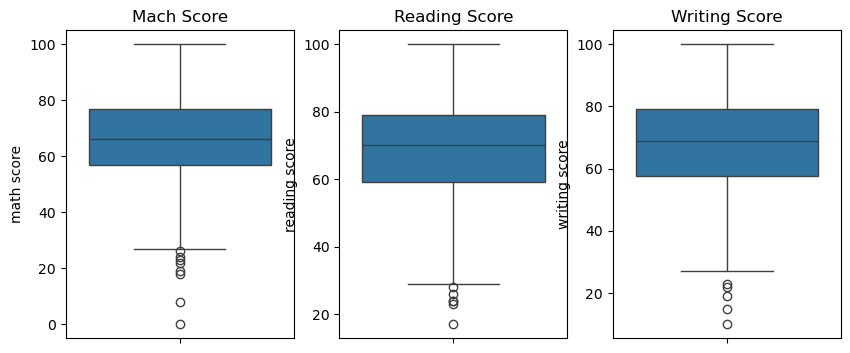

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.boxplot(df["math score"])
plt.title("Mach Score")

plt.subplot(1,3,2)
sns.boxplot(df["reading score"])
plt.title("Reading Score")

plt.subplot(1,3,3)
sns.boxplot(df["writing score"])
plt.title("Writing Score")
plt.show()

#### Step 2.2
  - Calculate the Interquartile Range (IQR) for each of these score columns.
  - **IQR** - Inter Quantile Range (Different Between Q1 to Q3) = **Q3-Q1**

In [8]:
M_Q1 = df["math score"].quantile(0.25)
M_Q3 = df["math score"].quantile(0.75)
Math_Score_IQR = M_Q3 - M_Q1
print(f"Math Score IQR Value is : {Math_Score_IQR}")

Math Score IQR Value is : 20.0


In [9]:
R_Q1 = df["reading score"].quantile(0.25)
R_Q3 = df["reading score"].quantile(0.75)
Reading_Score_IQR = R_Q3 - R_Q1
print(f"Reading Score IQR Value is : {Reading_Score_IQR}")

Reading Score IQR Value is : 20.0


In [10]:
W_Q1 = df["writing score"].quantile(0.25)
W_Q3 = df["writing score"].quantile(0.75)
Writing_Score_IQR = W_Q3 - W_Q1
print(f"Writing Score IQR Value is : {Writing_Score_IQR}")

Writing Score IQR Value is : 21.25


#### Step 2.3
- Determine the lower and upper bounds for outliers using the IQR method.
- Lower Pound ( Lowest value of the Range) = **Q1-1.5*IQR**
- Upper Pound(Highest Value of the Range) = **Q3+1.5*IQR**

In [11]:
M_lower_pound = M_Q1-1.5*Math_Score_IQR
M_upper_pound = M_Q3 +1.5*Math_Score_IQR
print(f'Math Score Lower Pound Value Is {M_lower_pound} and Upper Pound Is {M_upper_pound}')

Math Score Lower Pound Value Is 27.0 and Upper Pound Is 107.0


In [12]:
R_lower_pound = R_Q1-1.5*Reading_Score_IQR
R_upper_pound = R_Q3 +1.5*Reading_Score_IQR
print(f'Math Score Lower Pound Value Is {R_lower_pound} and Upper Pound Is {R_upper_pound}')

Math Score Lower Pound Value Is 29.0 and Upper Pound Is 109.0


In [13]:
W_lower_pound = W_Q1-1.5*Writing_Score_IQR
W_upper_pound = W_Q3 +1.5*Writing_Score_IQR
print(f'Math Score Lower Pound Value Is {W_lower_pound} and Upper Pound Is {W_upper_pound}')

Math Score Lower Pound Value Is 25.875 and Upper Pound Is 110.875


#### Step 2.4
- Handle the outliers by removing them from the dataset   
 **We can Removed Outlier Using Z-Score or Five Number Summery**
  
#### Zscore Method:
  - from scipy import stats
  - df_zscore=df.copy()
  - df_zscore["Zscore"]=stats.zscore(df_zscore["math score"])
  - thresholdvalue=2 (Assumed Value)
  - df_zcore_RO=(df_zscore[(df_zscore["Zscore"]>=-thresholdvalue) & (df_zscore["Zscore"]<=thresholdvalue)])
  - df_zcore_RO
  - sns.boxplot(data=df_zcore_RO,x="Zscore")
                                            
#### Five Number Summery:
  - removed lower fence datapoint and upper fence datapoint from the dataset

##### In this dataset we use Five Number Summery.

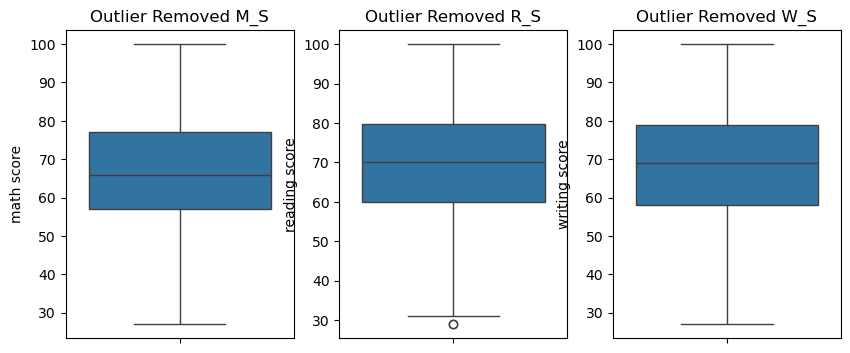

In [14]:
# using five number summery method
df_m = df[(df["math score"]>=M_lower_pound) & (df["math score"]<=M_upper_pound)]
df_r = df[(df["reading score"]>=R_lower_pound)& (df["reading score"]<=R_upper_pound)]
df_w = df[(df["writing score"]>=W_lower_pound)& (df["writing score"]<=W_upper_pound)]

# Check the Outlier for outlier_removed data using Boxplot:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.boxplot(df_m["math score"])
plt.title("Outlier Removed M_S")

plt.subplot(1,3,2)
sns.boxplot(df_r["reading score"])
plt.title("Outlier Removed R_S")

plt.subplot(1,3,3)
sns.boxplot(df_w["writing score"])
plt.title("Outlier Removed W_S")
plt.show()

### 3.	Check Distribution and Skewness:

#### Step 3.1
- Plot histograms and/or density plots for math score, reading score, and writing score to visualize their distributions

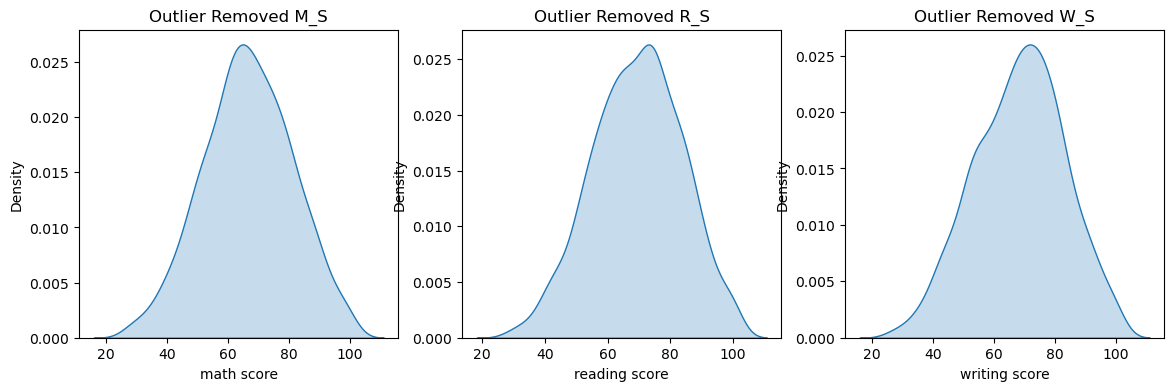

In [28]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.kdeplot(df_m["math score"],fill=True)
plt.title("Outlier Removed M_S")

plt.subplot(1,3,2)
sns.kdeplot(df_r["reading score"],fill=True)
plt.title("Outlier Removed R_S")

plt.subplot(1,3,3)
sns.kdeplot(df_w["writing score"],fill=True)
plt.title("Outlier Removed W_S")
plt.show()

#### Step 3.2
- Calculate and interpret the skewness for each of these score columns.           

In [30]:
print(df_m["math score"].skew())
print(df_r["reading score"].skew())
print(df_w["writing score"].skew())

-0.06930576171107476
-0.13875590076628647
-0.1632353356440884


- Skewness >0 its positve Skewness
- skewness <0 its negative Skewness
- skewness =0 its normal distribution

- **Math Score Skew is -0.06, the math score indicates sightly negative skewness but it almost nearest for 0 point so we consider as sightly positive skewness**  
- **Reading and Writing score skewness is above -0.1, so its indicates Sightly negative skewness**

Easy way to understand the Skewness [if the mean is > median Positive Skeawness/ If the Mean< median Neagative Skeawness]

In [15]:
# using easy method to find the Skewness
def find_skewness(data):
    if data.mean()>data.median():
        print("Positive Skewness")
    else:
        print("Negative Skewness")

# skewness for Math Score
find_skewness(df_m["math score"])
# skewness For Reading Score
find_skewness(df_r["reading score"])
# Skeaness for Writing Score
find_skewness(df_w["writing score"])


Positive Skewness
Negative Skewness
Negative Skewness


### Step 3.3
- Discuss whether the distributions are skewed to the left or right and suggest any appropriate transformations if needed to address skewness.
 
 
 - **NOTE: All score skewness values are between -0.5 and +0.5, indicating the distributions are approximately symmetric.so no transformation is required.For practice purposes,we can apply a transformation once**
  
  **we can use Squareroot or Log transformation for handle the skewness**
  
  

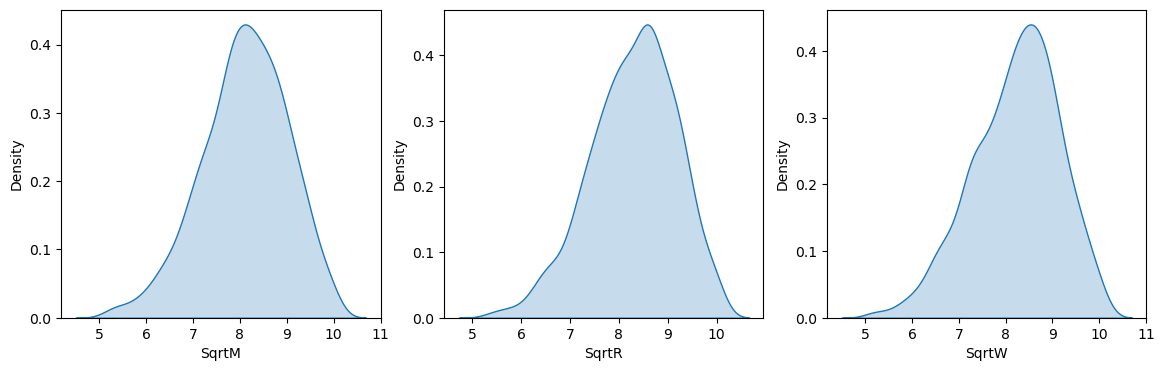

In [16]:
import numpy as np
df_m1=df_m.copy()
df_m1["SqrtM"]=np.sqrt(df_m1["math score"])
df_r1=df_r.copy()
df_r1["SqrtR"]=np.sqrt(df_r1["reading score"])
df_w1=df_w.copy()
df_w1["SqrtW"]=np.sqrt(df_w1["writing score"])

# create visuals for transformations data:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.kdeplot(df_m1["SqrtM"],fill=True)

plt.subplot(1,3,2)
sns.kdeplot(df_r1["SqrtR"],fill=True)

plt.subplot(1,3,3)
sns.kdeplot(df_w1["SqrtW"],fill=True)
plt.show()

**After the Transformation, there is nothing Big changes in Skewness**

### 4.	Hypothesis Testing:
#### Step 4.1.
- Formulate Hypotheses:  
  ➢	State the null and alternative hypotheses to test whether the mean math score differs between students who completed the test preparation course and those who did not.


  - **H0=There is no Significance Difference between mean math score and student who comleted the test preparation course or not**
  - **H1=There is Difference between mean math score and student who comleted the test preparation course or not**

#### Step 4.2.
- Significance Level:(is a threshold value for reject null hypothesis or not)
- **a=0.05** (95% confidence level)
- **P value is <= alpha we can reject null Hypothesis**

#### Step 4.3. 
- t-test Test Statistic & p-value:
- **T-test useful for When the samller sample size(>30) or Population Std is Unknown** 

In [19]:
from scipy.stats import ttest_ind 

#Perform a t-test to compare the means of the two groups.
test_pre_completed = df[df["test preparation course"]=="completed"]["math score"]
test_pre_not_cmplt = df[df["test preparation course"]=="none"]["math score"]

#Calculate the test statistic and p-value
T_test,P_value = ttest_ind(test_pre_completed,test_pre_not_cmplt,equal_var=False) #( equal_var = false-->no need to find variance)
print('\n'f"T-test value : {T_test:.4f} , P-value : {P_value:.4f}")

# Provide the results and interpret them in the context of the hypothesis.
alpha=0.05
if P_value<alpha:
    print("\nReject H0")
else:
    print("Do not reject H0")


T-test value : 5.7870 , P-value : 0.0000

Reject H0


#### Step 4.4.	
#### Decision:

- #### Based on the p-value or the t-statistic, decide whether to reject or fail to reject the null hypothesis.

  *The P-value is < the Alpha value , so we Reject the Null Hypothesis*
   - its indicates students who complete the Test_preparion_course they performing well in the math score
 
     
     

- #### Discuss the implications of your decision in relation to the context of the problem.  
  *if we reject H0:There is Difference between mean math score and student who comleted the test preparation course or not*

  *If we fail to reject H0: it means that completing the test preparation course does not significantly impact the math score, suggesting that other factors might be influencing performance.*